# Cost Reduction

## Definition

I defined reducing cost and maintened existing talent as longer employment length. If the employees stay longer than before, the company need no recruitment cost at all, make sense right?.

The problem is, how to achieve longer employment length? we should answer the following questions.
- Does marriage affects the employment length?
- Does seniority level affects the employment length?
- Does performance score affects the employment length?
- Does engagement survey affects the employment length?
- Does employee satisfaction affects the employment length?
- Does Special project count affets the employment length?
- Does absences affects the employment length?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('dataset HR analytics.csv')

In [3]:
data['employment_length'] = (pd.to_datetime(data['LastPerformanceReview_Date']) - pd.to_datetime(data['DateofHire'])).astype('timedelta64[D]')/360 #.astype('timedelta64[Y]')

# Insight

### Marriage

Text(0, 0.5, 'year')

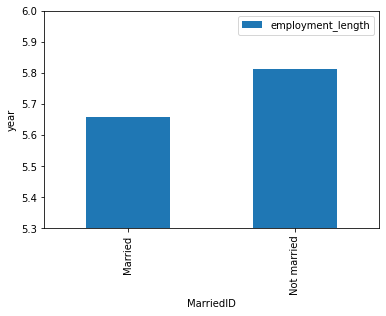

In [4]:
data[['MarriedID','employment_length']].groupby('MarriedID').mean().plot.bar()
plt.ylim(5.3,6)
plt.ylabel('year')

### Marital Status

Text(0, 0.5, 'year')

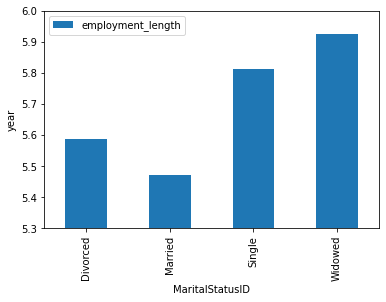

In [5]:
data[['MaritalStatusID','employment_length']].groupby('MaritalStatusID').mean().plot.bar()
plt.ylim(5.3,6)
plt.ylabel('year')

### Race

Text(0, 0.5, 'year')

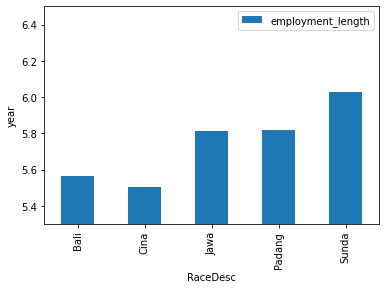

In [6]:
data[['RaceDesc','employment_length']].groupby('RaceDesc').mean().plot.bar()
plt.ylim(5.3,6.5)
plt.ylabel('year')

### Seniority Level

Text(0, 0.5, 'year')

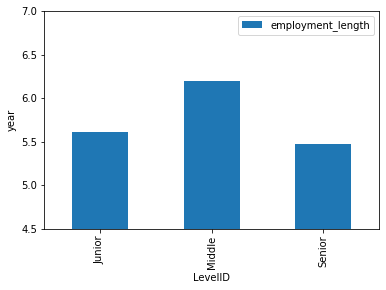

In [7]:
data[['LevelID','employment_length']].groupby('LevelID').mean().plot.bar()
plt.ylim(4.5,7)
plt.ylabel('year')

### Performance Score

Text(0, 0.5, 'year')

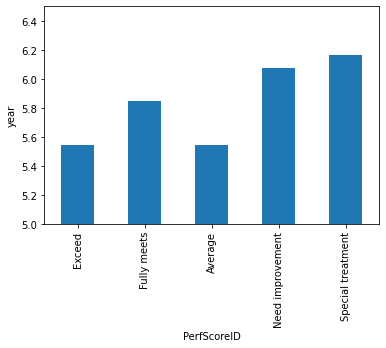

In [8]:
performance = ['Exceed', 'Fully meets', 'Average', 'Need improvement','Special treatment']
data[['PerfScoreID','employment_length']].groupby('PerfScoreID').mean().loc[performance].plot(kind="bar", legend=False)
plt.ylim(5,6.5)
plt.ylabel('year')

### Engagement survey

Text(0.5, 0, 'Engagement Score')

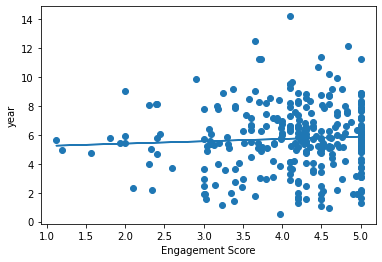

In [9]:
test = data[['EngagementSurvey','employment_length']]
x = test['EngagementSurvey']
y = test['employment_length']
plt.scatter(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.ylabel('year')
plt.xlabel('Engagement Score')

### Employee Satisfaction

Text(0, 0.5, 'year')

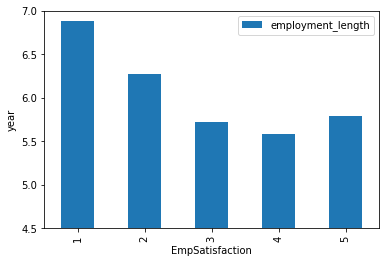

In [10]:
data[['EmpSatisfaction','employment_length']].groupby('EmpSatisfaction').mean().plot.bar()
plt.ylim(4.5,7)
plt.ylabel('year')

### Special Project

Text(0.5, 0, 'Speial Project count')

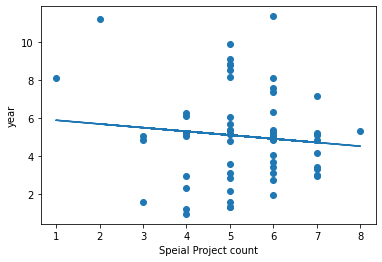

In [11]:
test = data[data['SpecialProjectsCount']>0][['SpecialProjectsCount','employment_length']]
x = test['SpecialProjectsCount']
y = test['employment_length']
plt.scatter(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.ylabel('year')
plt.xlabel('Speial Project count')

### Absences

Text(0.5, 0, 'Number of absences')

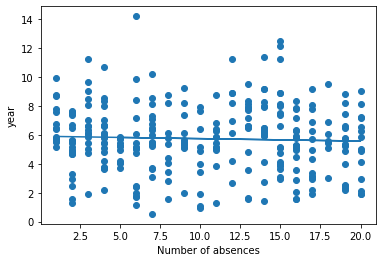

In [12]:
test = data[['Absences','employment_length']]
x = test['Absences']
y = test['employment_length']
plt.scatter(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.ylabel('year')
plt.xlabel('Number of absences')

# Terminate prediction

## Problem Definition

The talent management department wants to know on what condition an employee will terminate their position (voluntarily, underperformance, or another cause). This prediction system might get huge impact for talent management department, because they could prepare for talent replacement or further strategy.<br>

the target defined by this assumption,
- if an employee still active, then 0
- if an employee terminate his position on whatever the cause, then 1

### Target calculation

In [123]:
data['termination'] = data['EmploymentStatus'].apply(lambda x: 0 if x == 'Active' else 1)

## Features

### Feature definition

We will separate the features into two classification. The first one is categorical features and another one is numerical features. We will delete the Unique Identifier and other unnecessary parameter (like date) from dataset.

In [124]:
features = ['MarriedID', 'MaritalStatusID', 'GenderID','EmpStatusID','LevelID', 'PerfScoreID','RaceDesc','RecruitmentSource', 'EngagementSurvey','EmpSatisfaction', 'SpecialProjectsCount','DaysLateLast30', 'Absences', 'employment_length']
cat_features = ['MarriedID', 'MaritalStatusID', 'GenderID','EmpStatusID','RaceDesc','RecruitmentSource']
ordinal_features = ['PerfScoreID','LevelID']
num_features = ['PerfScoreID','EngagementSurvey','EmpSatisfaction', 'SpecialProjectsCount','DaysLateLast30', 'Absences', 'employment_length']

### Feature Engineering

#### One-hot-encoding

I will convert all of categorical feature to one-one hot encoding. Since it easier for model to process numerical value

In [125]:
move = 0
for i in cat_features:
    if move == 0:
        y = pd.get_dummies(data[i], prefix=i)
    else:
        y = pd.concat([y,pd.get_dummies(data[i], prefix=i)],axis=1)
    move+=1

#### ordinal conversion

##### Seniority level

In [126]:
LevelID = {'Senior':3,'Middle':2,'Junior':1}
data['LevelID'] = data['LevelID'].map(LevelID)

##### Seniority level

In [127]:
data['PerfScoreID'].unique()

array(['Exceed', 'Fully meets', 'Average', 'Need improvement',
       'Special treatment'], dtype=object)

In [128]:
PerfScoreID = {'Exceed':5,'Fully meets':4,'Average':3,'Need improvement':2,'Special treatment':1}
data['PerfScoreID'] = data['PerfScoreID'].map(PerfScoreID)

#### Merge

merge the engineered feature with numerical feature

In [129]:
processed_data = pd.concat([y,data[num_features],data[ordinal_features],data['termination']],axis=1)

## Data Preparation

## Train Test Split

In [137]:
from sklearn.model_selection import train_test_split

In [143]:
X_train, X_test, y_train, y_test = train_test_split(processed_data.iloc[:,:-1],processed_data.iloc[:,-1],stratify=processed_data.iloc[:,-1])

## Oversampling

<AxesSubplot:>

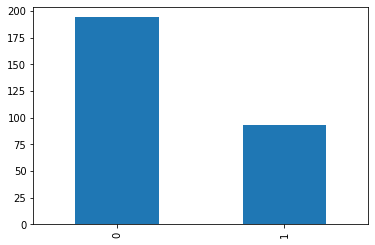

In [136]:
processed_data['termination'].value_counts().plot.bar()

since the dataset is unbalanced. I will balance the dataset. The balanced dataset might has huge impact to bad event sensitivity.

In [165]:
X_train.columns

Index(['MarriedID_Married', 'MarriedID_Not married',
       'MaritalStatusID_Divorced', 'MaritalStatusID_Married',
       'MaritalStatusID_Single', 'MaritalStatusID_Widowed', 'GenderID_F',
       'GenderID_M', 'EmpStatusID_Karyawan Organik', 'EmpStatusID_Prohire',
       'EmpStatusID_TKP/ Outsource', 'RaceDesc_Bali', 'RaceDesc_Cina',
       'RaceDesc_Jawa', 'RaceDesc_Padang', 'RaceDesc_Sunda',
       'RecruitmentSource_CareerBuilder',
       'RecruitmentSource_Diversity Job Fair',
       'RecruitmentSource_Employee Referral',
       'RecruitmentSource_Google Search', 'RecruitmentSource_Indeed',
       'RecruitmentSource_LinkedIn',
       'RecruitmentSource_On-line Web application', 'RecruitmentSource_Other',
       'RecruitmentSource_Website', 'PerfScoreID', 'EngagementSurvey',
       'EmpSatisfaction', 'SpecialProjectsCount', 'DaysLateLast30', 'Absences',
       'employment_length', 'PerfScoreID', 'LevelID'],
      dtype='object')

In [166]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=2432)
X_train_s, y_train_s = smote.fit_resample(X_train.values, y_train.values)

## Modelling

since majority of features are categorical. then we will use tree-based model. Another things, since we wanted to avoid unnecessary multicollinearity, tree-based model is the perfect choice.

In [158]:
from sklearn.ensemble import RandomForestClassifier

### Training

We will use GridSearchCV to optimize the model. This framework could achieve the optimum result.

In [159]:
from sklearn.model_selection import GridSearchCV

In [178]:
parameters = {
    'n_estimators':(10,20,35,50,100,300,200,500),
    'criterion':('gini','entropy')
}

In [179]:
model = GridSearchCV(RandomForestClassifier(random_state=123), parameters)
model.fit(X_train_s, y_train_s)

GridSearchCV(estimator=RandomForestClassifier(random_state=123),
             param_grid={'criterion': ('gini', 'entropy'),
                         'n_estimators': (10, 20, 35, 50, 100, 300, 200, 500)})

### Evaluation

In [180]:
from sklearn.metrics import recall_score,roc_auc_score

We will recall and AUC for this case. Both of metrics are normal utilized for binary classification and calculate the sensitiveness of bad event for trained model.

Our rule of thumb is,
- AUC > 0.65
- Recall > 0.4

Then our model is acceptable

In [187]:
best_model = model.best_estimator_

In [188]:
recall = recall_score(y_test, best_model.predict(X_test))
auc = roc_auc_score(y_test, best_model.predict(X_test))
print('recall:',recall)
print('auc:',auc)

recall: 0.6956521739130435
auc: 0.8070097604259096


### Save model

save model to pickle file, so that other service could utilize the prediction.

In [189]:
import pickle

with open('model.pickle', 'wb') as handle:
    pickle.dump(best_model, handle, protocol=pickle.HIGHEST_PROTOCOL)

## SHAP Analysis

SHAP is a framework to calculathe feature intepretability for black-box model. This framework could show the most and the least importance feature calculated by the model for certain dataset. It also calculate the positioning between features.

In [183]:
import shap

I will use SHAP to show how each feature correlates to another based on trained model. This can be achieved through the following function

In [184]:
def ABS_SHAP(df_shap,df,n):
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'green','red')
    
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = False).head(n)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Negative Impact)")

Let's show how each feature correlated

invalid value encountered in true_divide
invalid value encountered in true_divide


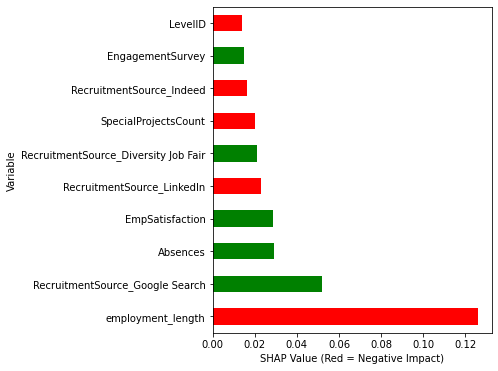

In [190]:
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_train)
ABS_SHAP(shap_values[1],X_train,10) 

From that figure, we conclude that the employee will get terminated if,
- the employee length got longer
- the employee is recruited from google search
- the employee do more absences during the work period
- The employee has higher employee satisfaction
- The employee is recruited from Job Fair
- The employee do more special project within the work period
- The employee has higher Engagement survey